# Predictive power score (PPS) heatmap for LTV data

Date 15/12/2023

## Importing Libraries

In [5]:
import pandas as pd
import numpy as np
import ppscore as pps
import matplotlib.pyplot as plt

In [6]:
import seaborn as sns
sns.set(rc={'figure.figsize':(35,30)})

## Importing Data

In [7]:
df_LTV = pd.read_csv("ltv.csv").copy()

In [8]:
list_columns = list(df_LTV.columns)

In [9]:
list_columns

['GBG',
 'ADAI_FOP_PRA_EXT_SAM',
 'CLOUD_FOP_PRA_EXT_SAM',
 'COREZ_FOP_PRA_EXT_SAM',
 'DWS_FOP_PRA_EXT_SAM',
 'NE_FOP_PRA_EXT_SAM',
 'SR_FOP_PRA_EXT_SAM',
 'ALL_FOP_PRA',
 'HGI_GROUP_HQ_REVENUE_TOTAL',
 'HGI_INDUSTRY_NAME',
 'HGI_GROUP_HQ_EMPLOYEE_TOTAL',
 'Current Segment',
 'APP_DATA_AI_SOW ',
 'CLOUD_SVCS_SOW',
 'CORE_ENT_ZCLOUD_SOW',
 'DIG_WRK_SOW',
 'NET_EDGE_SOW',
 'SEC_RESIL_SOW',
 'Total SOW']

In [10]:
list_remove = ['GBG','HGI_INDUSTRY_NAME','Current Segment'] #non-numerical columns that dont need preprocessing
for col in list_columns:
    if col in list_remove:
        list_columns.remove(col)
list_columns

['ADAI_FOP_PRA_EXT_SAM',
 'CLOUD_FOP_PRA_EXT_SAM',
 'COREZ_FOP_PRA_EXT_SAM',
 'DWS_FOP_PRA_EXT_SAM',
 'NE_FOP_PRA_EXT_SAM',
 'SR_FOP_PRA_EXT_SAM',
 'ALL_FOP_PRA',
 'HGI_GROUP_HQ_REVENUE_TOTAL',
 'HGI_GROUP_HQ_EMPLOYEE_TOTAL',
 'APP_DATA_AI_SOW ',
 'CLOUD_SVCS_SOW',
 'CORE_ENT_ZCLOUD_SOW',
 'DIG_WRK_SOW',
 'NET_EDGE_SOW',
 'SEC_RESIL_SOW',
 'Total SOW']

In [45]:
#for col in list_columns:
#    df_LTV[col] = df_LTV[col].str.replace(',','')
#    df_LTV[col] = df_LTV[col].str.replace('$','')
#    df_LTV[col] = df_LTV[col].str.strip()
#    df_LTV[col] = df_LTV[col].astype(float)

### Data preprocessing

In [11]:
df_LTV['ADAI_FOP_PRA_EXT_SAM'] = df_LTV['ADAI_FOP_PRA_EXT_SAM'].str.replace(',','')
df_LTV['ADAI_FOP_PRA_EXT_SAM'] = df_LTV['ADAI_FOP_PRA_EXT_SAM'].str.replace('$','')
df_LTV['ADAI_FOP_PRA_EXT_SAM'] = df_LTV['ADAI_FOP_PRA_EXT_SAM'].str.strip()
df_LTV['ADAI_FOP_PRA_EXT_SAM'] = df_LTV['ADAI_FOP_PRA_EXT_SAM'].astype(float)

df_LTV['CLOUD_FOP_PRA_EXT_SAM'] = df_LTV['CLOUD_FOP_PRA_EXT_SAM'].str.replace(',','')
df_LTV['CLOUD_FOP_PRA_EXT_SAM'] = df_LTV['CLOUD_FOP_PRA_EXT_SAM'].str.replace('$','')
df_LTV['CLOUD_FOP_PRA_EXT_SAM'] = df_LTV['CLOUD_FOP_PRA_EXT_SAM'].str.strip()
df_LTV['CLOUD_FOP_PRA_EXT_SAM'] = df_LTV['CLOUD_FOP_PRA_EXT_SAM'].astype(float)

df_LTV['COREZ_FOP_PRA_EXT_SAM'] = df_LTV['COREZ_FOP_PRA_EXT_SAM'].str.replace(',','')
df_LTV['COREZ_FOP_PRA_EXT_SAM'] = df_LTV['COREZ_FOP_PRA_EXT_SAM'].str.replace('$','')
df_LTV['COREZ_FOP_PRA_EXT_SAM'] = df_LTV['COREZ_FOP_PRA_EXT_SAM'].str.strip()
df_LTV['COREZ_FOP_PRA_EXT_SAM'] = df_LTV['COREZ_FOP_PRA_EXT_SAM'].astype(float)

df_LTV['DWS_FOP_PRA_EXT_SAM'] = df_LTV['DWS_FOP_PRA_EXT_SAM'].str.replace(',','')
df_LTV['DWS_FOP_PRA_EXT_SAM'] = df_LTV['DWS_FOP_PRA_EXT_SAM'].str.replace('$','')
df_LTV['DWS_FOP_PRA_EXT_SAM'] = df_LTV['DWS_FOP_PRA_EXT_SAM'].str.strip()
df_LTV['DWS_FOP_PRA_EXT_SAM'] = df_LTV['DWS_FOP_PRA_EXT_SAM'].astype(float)

df_LTV['NE_FOP_PRA_EXT_SAM'] = df_LTV['NE_FOP_PRA_EXT_SAM'].str.replace(',','')
df_LTV['NE_FOP_PRA_EXT_SAM'] = df_LTV['NE_FOP_PRA_EXT_SAM'].str.replace('$','')
df_LTV['NE_FOP_PRA_EXT_SAM'] = df_LTV['NE_FOP_PRA_EXT_SAM'].str.strip()
df_LTV['NE_FOP_PRA_EXT_SAM'] = df_LTV['NE_FOP_PRA_EXT_SAM'].astype(float)

df_LTV['SR_FOP_PRA_EXT_SAM'] = df_LTV['SR_FOP_PRA_EXT_SAM'].str.replace(',','')
df_LTV['SR_FOP_PRA_EXT_SAM'] = df_LTV['SR_FOP_PRA_EXT_SAM'].str.replace('$','')
df_LTV['SR_FOP_PRA_EXT_SAM'] = df_LTV['SR_FOP_PRA_EXT_SAM'].str.strip()
df_LTV['NE_FOP_PRA_EXT_SAM'] = df_LTV['NE_FOP_PRA_EXT_SAM'].astype(float)

df_LTV['ALL_FOP_PRA'] = df_LTV['ALL_FOP_PRA'].str.replace(',','')
df_LTV['ALL_FOP_PRA'] = df_LTV['ALL_FOP_PRA'].str.replace('$','')
df_LTV['ALL_FOP_PRA'] = df_LTV['ALL_FOP_PRA'].str.strip()
df_LTV['ALL_FOP_PRA'] = df_LTV['ALL_FOP_PRA'].astype(float)

df_LTV['HGI_GROUP_HQ_REVENUE_TOTAL'] = df_LTV['HGI_GROUP_HQ_REVENUE_TOTAL'].str.replace(',','')
df_LTV['HGI_GROUP_HQ_REVENUE_TOTAL'] = df_LTV['HGI_GROUP_HQ_REVENUE_TOTAL'].str.replace('$','')
df_LTV['HGI_GROUP_HQ_REVENUE_TOTAL'] = df_LTV['HGI_GROUP_HQ_REVENUE_TOTAL'].str.strip()
df_LTV['HGI_GROUP_HQ_REVENUE_TOTAL'] = df_LTV['HGI_GROUP_HQ_REVENUE_TOTAL'].astype(float)

C:\Users\AishaniSanjayPatil\AppData\Local\Temp\ipykernel_23360\2015568080.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_LTV['ADAI_FOP_PRA_EXT_SAM'] = df_LTV['ADAI_FOP_PRA_EXT_SAM'].str.replace('$','')
C:\Users\AishaniSanjayPatil\AppData\Local\Temp\ipykernel_23360\2015568080.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_LTV['CLOUD_FOP_PRA_EXT_SAM'] = df_LTV['CLOUD_FOP_PRA_EXT_SAM'].str.replace('$','')
C:\Users\AishaniSanjayPatil\AppData\Local\Temp\ipykernel_23360\2015568080.py:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal stri

In [12]:
df_LTV['APP_DATA_AI_SOW '] = df_LTV['APP_DATA_AI_SOW '].str.replace('%','')
df_LTV['APP_DATA_AI_SOW '] = df_LTV['APP_DATA_AI_SOW '].str.strip()
df_LTV['APP_DATA_AI_SOW '] = df_LTV['APP_DATA_AI_SOW '].astype(float)

df_LTV['CLOUD_SVCS_SOW'] = df_LTV['CLOUD_SVCS_SOW'].str.replace('%','')
df_LTV['CLOUD_SVCS_SOW'] = df_LTV['CLOUD_SVCS_SOW'].str.strip()
df_LTV['CLOUD_SVCS_SOW'] = df_LTV['CLOUD_SVCS_SOW'].astype(float)

df_LTV['CORE_ENT_ZCLOUD_SOW'] = df_LTV['CORE_ENT_ZCLOUD_SOW'].str.replace('%','')
df_LTV['CORE_ENT_ZCLOUD_SOW'] = df_LTV['CORE_ENT_ZCLOUD_SOW'].str.strip()
df_LTV['CORE_ENT_ZCLOUD_SOW'] = df_LTV['CORE_ENT_ZCLOUD_SOW'].astype(float)

df_LTV['DIG_WRK_SOW'] = df_LTV['DIG_WRK_SOW'].str.replace('%','')
df_LTV['DIG_WRK_SOW'] = df_LTV['DIG_WRK_SOW'].str.strip()
df_LTV['DIG_WRK_SOW'] = df_LTV['DIG_WRK_SOW'].astype(float)

df_LTV['NET_EDGE_SOW'] = df_LTV['NET_EDGE_SOW'].str.replace('%','')
df_LTV['NET_EDGE_SOW'] = df_LTV['NET_EDGE_SOW'].str.strip()
df_LTV['NET_EDGE_SOW'] = df_LTV['NET_EDGE_SOW'].astype(float)

df_LTV['SEC_RESIL_SOW'] = df_LTV['SEC_RESIL_SOW'].str.replace('%','')
df_LTV['SEC_RESIL_SOW'] = df_LTV['SEC_RESIL_SOW'].str.strip()
df_LTV['SEC_RESIL_SOW'] = df_LTV['SEC_RESIL_SOW'].astype(float)

df_LTV['Total SOW'] = df_LTV['Total SOW'].str.replace('%','')
df_LTV['Total SOW'] = df_LTV['Total SOW'].str.strip()
df_LTV['Total SOW'] = df_LTV['Total SOW'].astype(float)

In [53]:
#df_LTV['ADAI_FOP_PRA_EXT_SAM'] = df_LTV['ADAI_FOP_PRA_EXT_SAM'].astype(float)

In [13]:
df_LTV

,GBG,ADAI_FOP_PRA_EXT_SAM,CLOUD_FOP_PRA_EXT_SAM,COREZ_FOP_PRA_EXT_SAM,DWS_FOP_PRA_EXT_SAM,NE_FOP_PRA_EXT_SAM,SR_FOP_PRA_EXT_SAM,ALL_FOP_PRA,HGI_GROUP_HQ_REVENUE_TOTAL,HGI_INDUSTRY_NAME,HGI_GROUP_HQ_EMPLOYEE_TOTAL,Current Segment,APP_DATA_AI_SOW,CLOUD_SVCS_SOW,CORE_ENT_ZCLOUD_SOW,DIG_WRK_SOW,NET_EDGE_SOW,SEC_RESIL_SOW,Total SOW
0,GB30290W,11001.0,16338.0,1750.0,9001.0,13029.0,11821,62939.0,3.505434e+09,Insurance,7204.0,Strategic,10168.0,16861.0,0.0,15146.0,6315.0,4807.0,10530.0
1,GB302T7F,2543547.0,12563829.0,1708862.0,6957337.0,13041304.0,6453837,43268716.0,5.134394e+09,Computer and Electronic Product Manufacturing,24000.0,NaN,5666.0,31.0,218.0,0.0,387.0,0.0,467.0
2,GB3028WN,358669.0,1194696.0,162789.0,846289.0,967298.0,705838,4235578.0,3.273780e+08,Banking and Financial Services,534.0,Core,1722.0,2290.0,2312.0,19.0,512.0,2423.0,1405.0
3,GB302SCW,55082.0,81543.0,13299.0,52588.0,73585.0,51973,328070.0,1.581997e+08,Service Industry,1457.0,NaN,1143.0,0.0,0.0,0.0,0.0,0.0,192.0
4,GB3029TR,19016.0,12581.0,1201.0,5065.0,8129.0,11174,57167.0,9.770600e+07,Industry Associations,3500.0,NaN,965.0,3927.0,5763.0,7760.0,2040.0,3510.0,2970.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9314,GB407994,73898.0,286383.0,39489.0,202833.0,218059.0,166356,987018.0,8.781155e+07,Banking and Financial Services,1988.0,NaN,0.0,389.0,23.0,0.0,215.0,3.0,162.0
9315,GB302BJ7,68500196.0,177605502.0,24514275.0,103155877.0,176448889.0,100159476,650384216.0,7.579528e+10,Computer and Electronic Product Manufacturing,300000.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9316,GB302CF3,32582278.0,69292283.0,9004663.0,44146390.0,53630171.0,39626869,248282654.0,1.865700e+10,"Professional, Scientific and Technical Services",90000.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9317,GB302C07,122928749.0,249090899.0,32488859.0,159049929.0,193011693.0,146162891,902733020.0,1.316976e+06,"Professional, Scientific and Technical Services",0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
df_LTV['HGI_INDUSTRY_NAME'].unique()

array(['Insurance', 'Computer and Electronic Product Manufacturing',
       'Banking and Financial Services', 'Service Industry',
       'Industry Associations', 'Wholesale Trade',
       'Professional, Scientific and Technical Services',
       'Construction and Real Estate', 'Retail Trade', 'Manufacturing',
       'Utilities', 'Travel and Tourism',
       'Pharmaceuticals and Chemicals Manufacturing',
       'Media and Entertainment', 'Public Administration',
       'Transportation and Warehousing', 'Telecommunications',
       'Mining and Natural Resources',
       'Health Care and Social Assistance', 'Others',
       'Agriculture, Forestry and Fishing', 'Educational Services',
       'Holding Companies'], dtype=object)

### Filtering out columns with missing values

In [15]:
df_LTV_filtered = df_LTV[df_LTV.columns[df_LTV.isnull().mean() < 0.20]]

In [16]:
df_LTV_filtered

,GBG,ADAI_FOP_PRA_EXT_SAM,CLOUD_FOP_PRA_EXT_SAM,COREZ_FOP_PRA_EXT_SAM,DWS_FOP_PRA_EXT_SAM,NE_FOP_PRA_EXT_SAM,SR_FOP_PRA_EXT_SAM,ALL_FOP_PRA,HGI_GROUP_HQ_REVENUE_TOTAL,HGI_INDUSTRY_NAME,HGI_GROUP_HQ_EMPLOYEE_TOTAL,APP_DATA_AI_SOW,CLOUD_SVCS_SOW,CORE_ENT_ZCLOUD_SOW,DIG_WRK_SOW,NET_EDGE_SOW,SEC_RESIL_SOW,Total SOW
0,GB30290W,11001.0,16338.0,1750.0,9001.0,13029.0,11821,62939.0,3.505434e+09,Insurance,7204.0,10168.0,16861.0,0.0,15146.0,6315.0,4807.0,10530.0
1,GB302T7F,2543547.0,12563829.0,1708862.0,6957337.0,13041304.0,6453837,43268716.0,5.134394e+09,Computer and Electronic Product Manufacturing,24000.0,5666.0,31.0,218.0,0.0,387.0,0.0,467.0
2,GB3028WN,358669.0,1194696.0,162789.0,846289.0,967298.0,705838,4235578.0,3.273780e+08,Banking and Financial Services,534.0,1722.0,2290.0,2312.0,19.0,512.0,2423.0,1405.0
3,GB302SCW,55082.0,81543.0,13299.0,52588.0,73585.0,51973,328070.0,1.581997e+08,Service Industry,1457.0,1143.0,0.0,0.0,0.0,0.0,0.0,192.0
4,GB3029TR,19016.0,12581.0,1201.0,5065.0,8129.0,11174,57167.0,9.770600e+07,Industry Associations,3500.0,965.0,3927.0,5763.0,7760.0,2040.0,3510.0,2970.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9314,GB407994,73898.0,286383.0,39489.0,202833.0,218059.0,166356,987018.0,8.781155e+07,Banking and Financial Services,1988.0,0.0,389.0,23.0,0.0,215.0,3.0,162.0
9315,GB302BJ7,68500196.0,177605502.0,24514275.0,103155877.0,176448889.0,100159476,650384216.0,7.579528e+10,Computer and Electronic Product Manufacturing,300000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9316,GB302CF3,32582278.0,69292283.0,9004663.0,44146390.0,53630171.0,39626869,248282654.0,1.865700e+10,"Professional, Scientific and Technical Services",90000.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9317,GB302C07,122928749.0,249090899.0,32488859.0,159049929.0,193011693.0,146162891,902733020.0,1.316976e+06,"Professional, Scientific and Technical Services",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## PPS calculation

In [17]:
pps_ltv_filtered = pps.matrix(df_LTV_filtered)

C:\Users\AishaniSanjayPatil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\AishaniSanjayPatil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\AishaniSanjayPatil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\AishaniSanjayPatil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra

In [18]:
pps_ltv_filtered

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,GBG,GBG,1.0,predict_itself,True,None,0.0000,1.000000,None
1,GBG,ADAI_FOP_PRA_EXT_SAM,0.0,feature_is_id,True,None,0.0000,0.000000,None
2,GBG,CLOUD_FOP_PRA_EXT_SAM,0.0,feature_is_id,True,None,0.0000,0.000000,None
3,GBG,COREZ_FOP_PRA_EXT_SAM,0.0,feature_is_id,True,None,0.0000,0.000000,None
4,GBG,DWS_FOP_PRA_EXT_SAM,0.0,feature_is_id,True,None,0.0000,0.000000,None
...,...,...,...,...,...,...,...,...,...
319,Total SOW,CORE_ENT_ZCLOUD_SOW,0.0,regression,True,mean absolute error,79.6742,109.440062,DecisionTreeRegressor()
320,Total SOW,DIG_WRK_SOW,0.0,regression,True,mean absolute error,8.2624,11.711843,DecisionTreeRegressor()
321,Total SOW,NET_EDGE_SOW,0.0,regression,True,mean absolute error,4.5762,5.763404,DecisionTreeRegressor()
322,Total SOW,SEC_RESIL_SOW,0.0,regression,True,mean absolute error,14.6932,17.965603,DecisionTreeRegressor()


In [89]:
#predictor_df = pps.predictors(pps_ltv_filtered, y = 'y')
#sns.barplot(data = predictor_df , x = 'x', y = 'ppscore')

In [23]:
pps_ltv_pivoted = pps_ltv_filtered.pivot(columns='y', index='x', values='ppscore')
pps_ltv_pivoted = pps_ltv_pivoted.rename_axis(None, axis=1) 
pps_ltv_pivoted = pps_ltv_pivoted.rename_axis(None, axis=0)
pps_ltv_pivoted.head()

,ADAI_FOP_PRA_EXT_SAM,ALL_FOP_PRA,APP_DATA_AI_SOW,CLOUD_FOP_PRA_EXT_SAM,CLOUD_SVCS_SOW,COREZ_FOP_PRA_EXT_SAM,CORE_ENT_ZCLOUD_SOW,DIG_WRK_SOW,DWS_FOP_PRA_EXT_SAM,GBG,HGI_GROUP_HQ_EMPLOYEE_TOTAL,HGI_GROUP_HQ_REVENUE_TOTAL,HGI_INDUSTRY_NAME,NET_EDGE_SOW,NE_FOP_PRA_EXT_SAM,SEC_RESIL_SOW,SR_FOP_PRA_EXT_SAM,Total SOW
ADAI_FOP_PRA_EXT_SAM,1.000000,0.700099,0.0,0.662982,0.0,0.608158,0.0,0.0,0.565636,0.0,0.0,0.137518,0.027921,0.0,0.582974,0.0,2.174971e-02,0.000000
ALL_FOP_PRA,0.714987,1.000000,0.0,0.936838,0.0,0.888531,0.0,0.0,0.846258,0.0,0.0,0.073841,0.026424,0.0,0.856016,0.0,2.168876e-02,0.000000
APP_DATA_AI_SOW,0.000000,0.000000,1.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,6.086089e-07,0.000000
CLOUD_FOP_PRA_EXT_SAM,0.684052,0.936959,0.0,1.000000,0.0,0.915657,0.0,0.0,0.848919,0.0,0.0,0.047584,0.029918,0.0,0.859674,0.0,2.170209e-02,0.000000
CLOUD_SVCS_SOW,0.000000,0.000000,0.0,0.000000,1.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,1.658838e-06,0.198132


In [24]:
pps_ltv_pivoted

,ADAI_FOP_PRA_EXT_SAM,ALL_FOP_PRA,APP_DATA_AI_SOW,CLOUD_FOP_PRA_EXT_SAM,CLOUD_SVCS_SOW,COREZ_FOP_PRA_EXT_SAM,CORE_ENT_ZCLOUD_SOW,DIG_WRK_SOW,DWS_FOP_PRA_EXT_SAM,GBG,HGI_GROUP_HQ_EMPLOYEE_TOTAL,HGI_GROUP_HQ_REVENUE_TOTAL,HGI_INDUSTRY_NAME,NET_EDGE_SOW,NE_FOP_PRA_EXT_SAM,SEC_RESIL_SOW,SR_FOP_PRA_EXT_SAM,Total SOW
ADAI_FOP_PRA_EXT_SAM,1.000000,0.700099,0.0,0.662982,0.000000,0.608158,0.0,0.0,0.565636,0.0,0.000000,0.137518,0.027921,0.0,0.582974,0.0,2.174971e-02,0.000000
ALL_FOP_PRA,0.714987,1.000000,0.0,0.936838,0.000000,0.888531,0.0,0.0,0.846258,0.0,0.000000,0.073841,0.026424,0.0,0.856016,0.0,2.168876e-02,0.000000
APP_DATA_AI_SOW,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,6.086089e-07,0.000000
CLOUD_FOP_PRA_EXT_SAM,0.684052,0.936959,0.0,1.000000,0.000000,0.915657,0.0,0.0,0.848919,0.0,0.000000,0.047584,0.029918,0.0,0.859674,0.0,2.170209e-02,0.000000
CLOUD_SVCS_SOW,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1.658838e-06,0.198132
COREZ_FOP_PRA_EXT_SAM,0.651034,0.893138,0.0,0.915381,0.000000,1.000000,0.0,0.0,0.853127,0.0,0.000000,0.071649,0.028078,0.0,0.862929,0.0,2.150304e-02,0.000000
CORE_ENT_ZCLOUD_SOW,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1.040555e-06,0.000000
DIG_WRK_SOW,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,1.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,5.909813e-07,0.000000
DWS_FOP_PRA_EXT_SAM,0.589020,0.850007,0.0,0.855809,0.000000,0.870024,0.0,0.0,1.000000,0.0,0.000000,0.000000,0.025315,0.0,0.834400,0.0,2.195543e-02,0.000000
GBG,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000e+00,0.000000


In [113]:
pps_ltv_pivoted.sum().sort_values()

GBG                            1.000000
DIG_WRK_SOW                    1.000001
APP_DATA_AI_SOW                1.000001
NET_EDGE_SOW                   1.000001
CORE_ENT_ZCLOUD_SOW            1.000001
SEC_RESIL_SOW                  1.000001
HGI_INDUSTRY_NAME              1.000304
CLOUD_SVCS_SOW                 1.198133
Total SOW                      1.410169
HGI_GROUP_HQ_EMPLOYEE_TOTAL    1.498578
SR_FOP_PRA_EXT_SAM             2.487277
HGI_GROUP_HQ_REVENUE_TOTAL     3.324475
ADAI_FOP_PRA_EXT_SAM           4.307038
DWS_FOP_PRA_EXT_SAM            5.046529
NE_FOP_PRA_EXT_SAM             5.208667
COREZ_FOP_PRA_EXT_SAM          5.296839
CLOUD_FOP_PRA_EXT_SAM          5.344466
ALL_FOP_PRA                    5.364584
dtype: float64

In [102]:
sns.set(font_scale=2)

<Axes: >

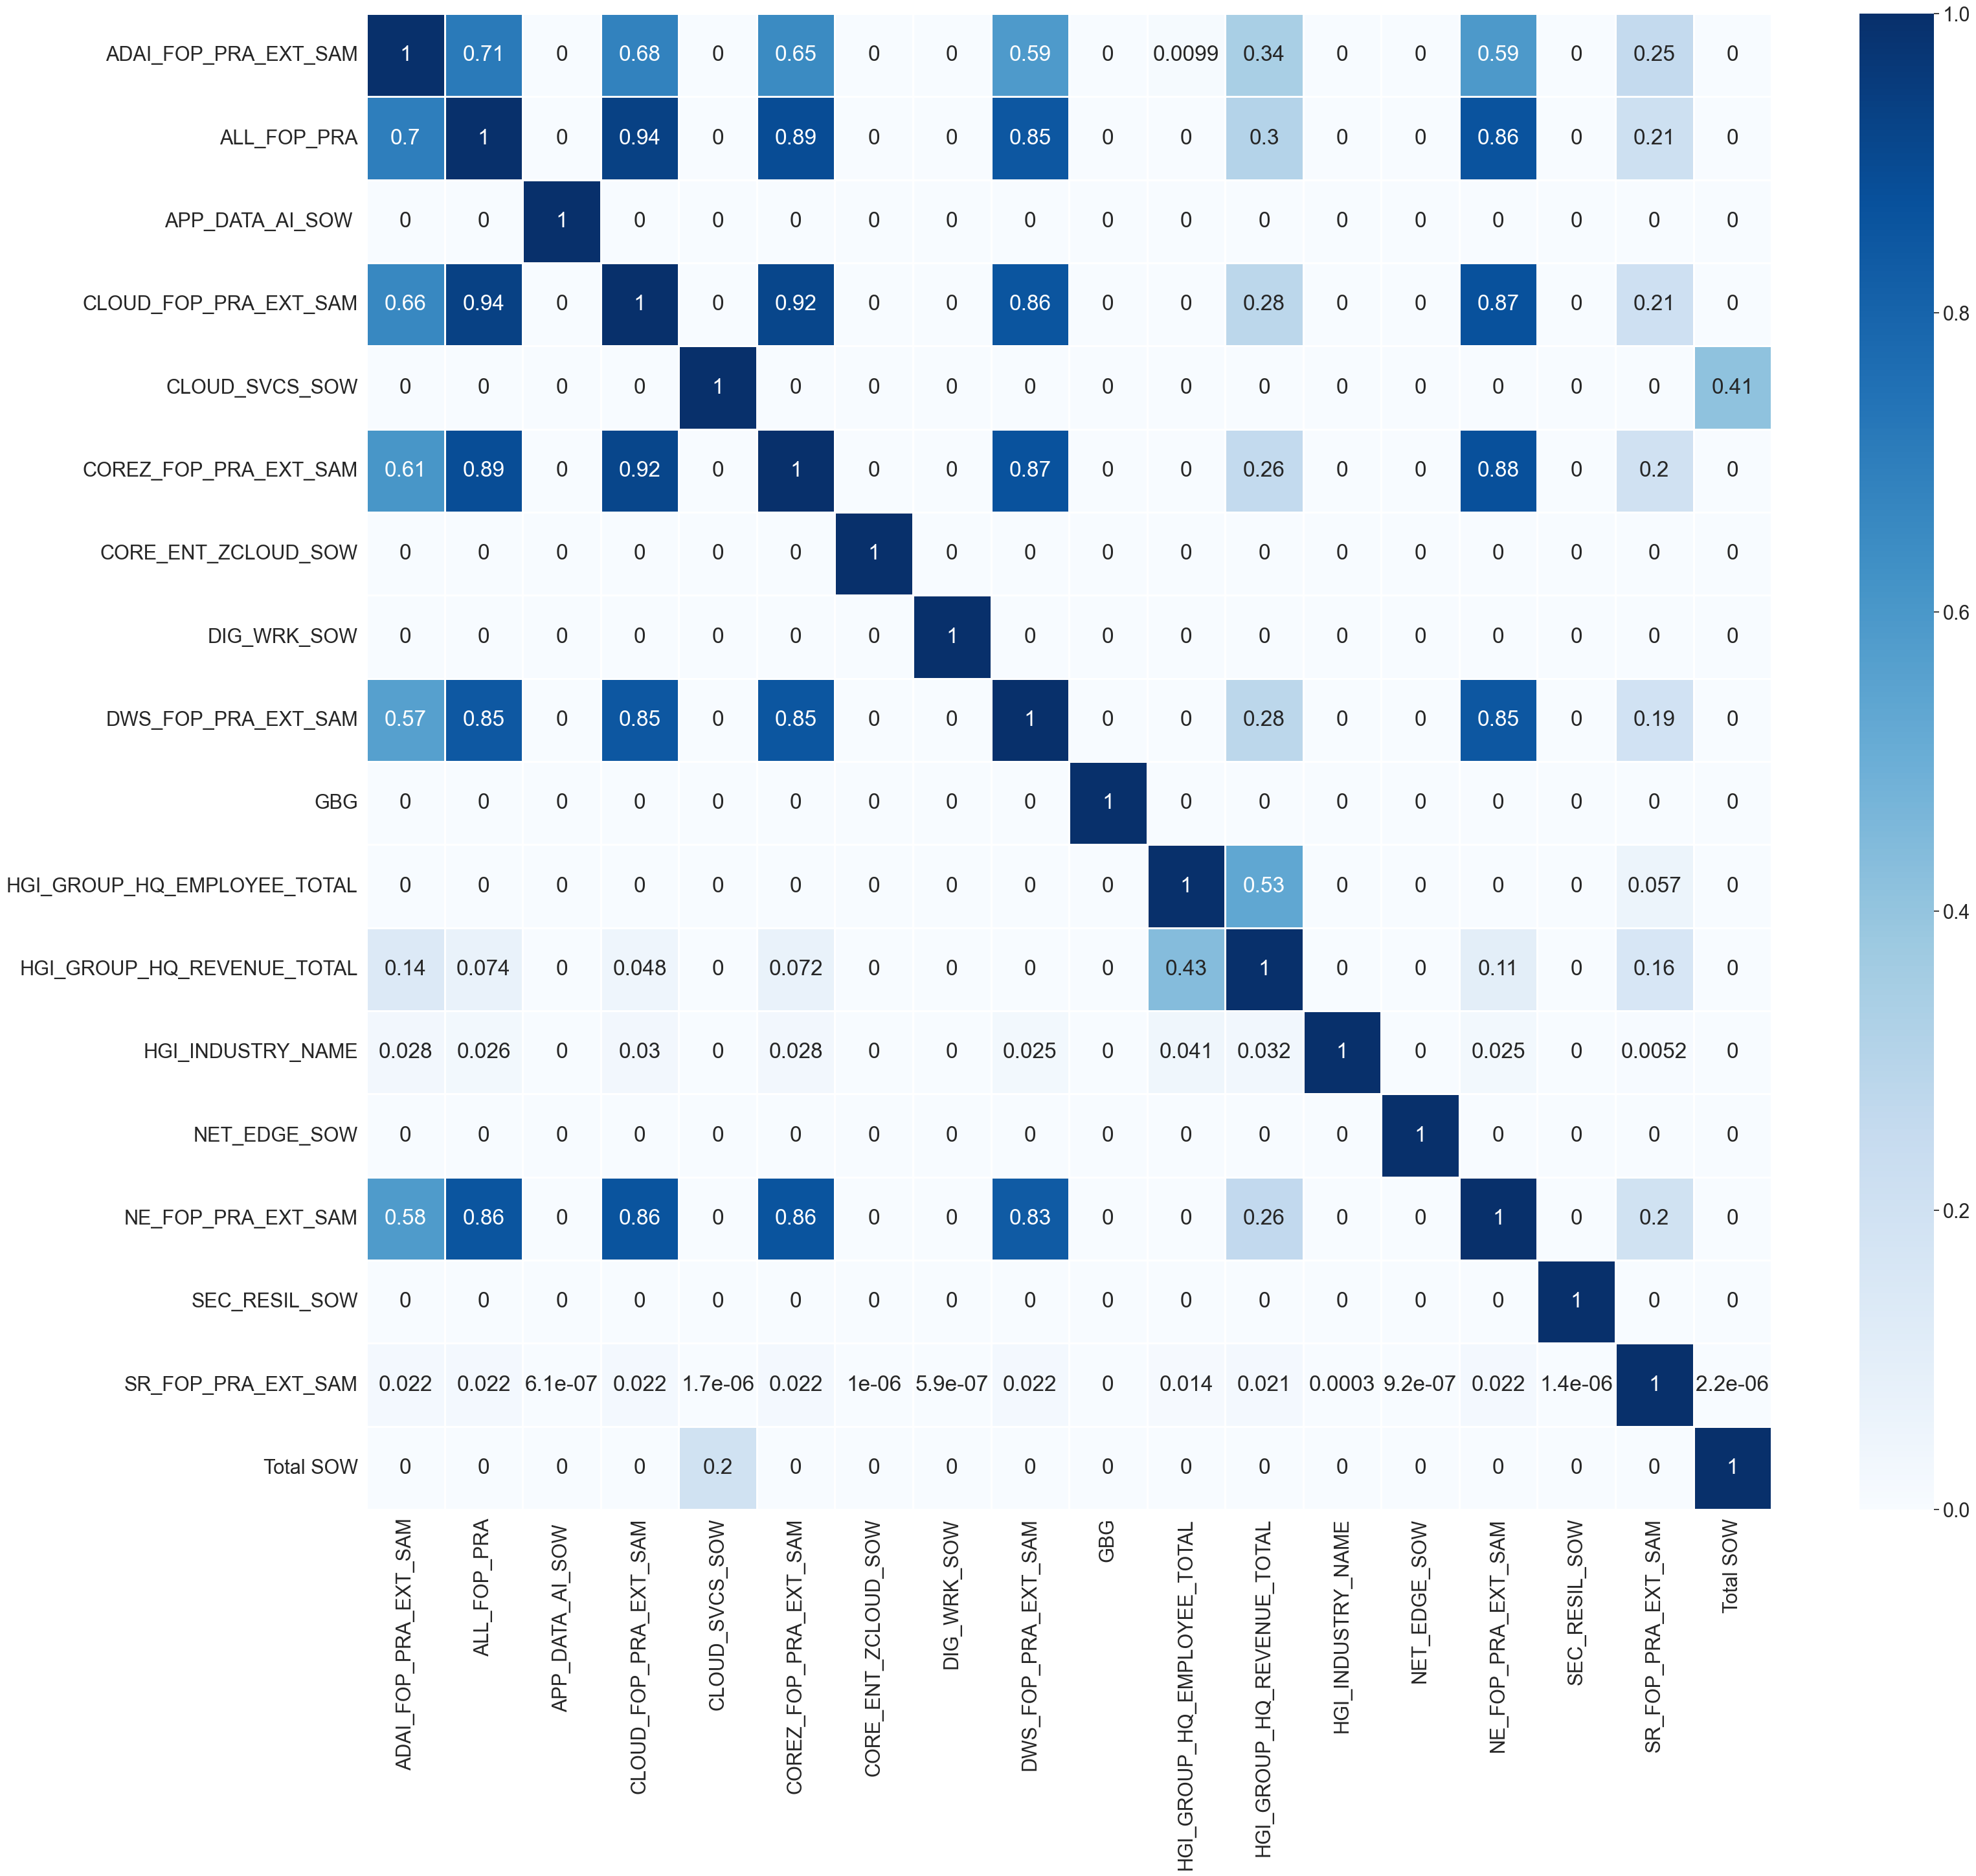

In [103]:
sns.heatmap(pps_ltv_pivoted, vmin=0, vmax=1, cmap="Blues", linewidths= 1, annot = True)

Text(0.5, 1.0, 'Full Data')

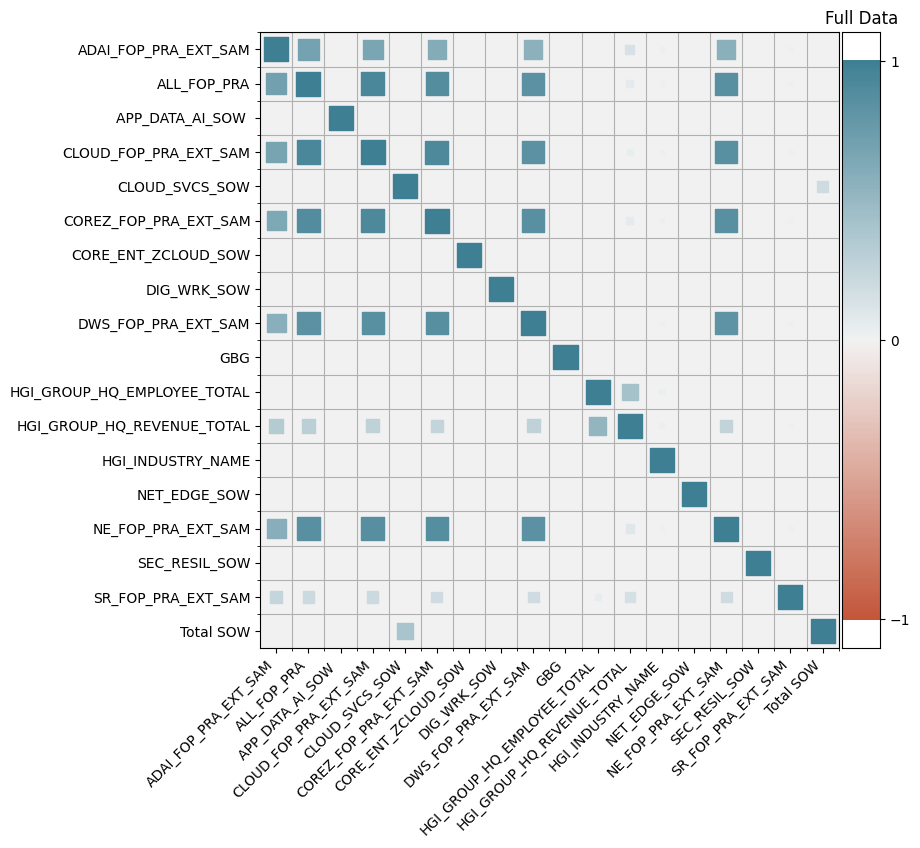

In [63]:
from heatmap import heatmap, corrplot
plt.figure(figsize=(8, 8))
corrplot(pps_ltv_piv, size_scale=300)
plt.title("Full Data")